# Exercise 7
   #### Sandra Marcela Meneses Quinchía  -    código: 201727731
   #### Diego Fernando López Castillo    -    código:200919053

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [4]:
#10000 imagenes de 32 x 32 y el 3 es las 3 matrices
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [6]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6])

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

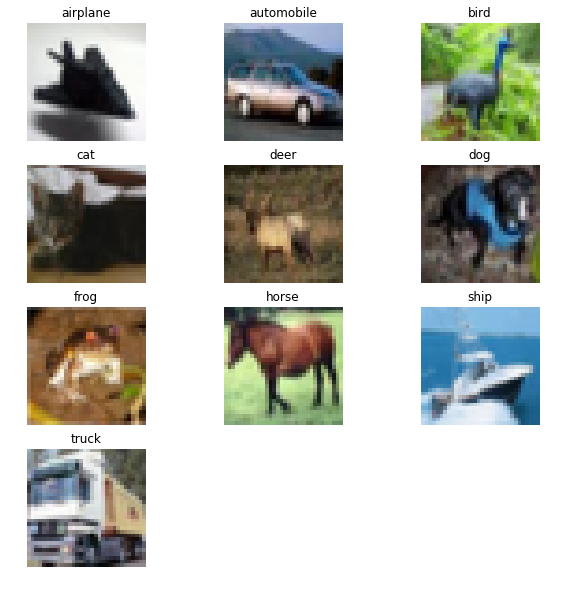

In [10]:
#me llega una imagen y quiero decir a que categoria me pertenece
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [25]:
#regresion softmax, probabilidades suman 1, es multinomial
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from livelossplot import PlotLossesKeras

Se debe incluir un modelo softmax
-Input: 32x32x3
-Inicializar con secuencia, luego flatten(input size), luego una capa densa con las 10 neuronas de salida
-luego toca usar el compile y .fit
-la regresión me recibe un solo vector. Convierto la matriz a un vector. el vector es de dimension 3072
-output: es la cantidad de categorías en este caso 10

In [18]:
#Modelo
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [44]:
#Train
from keras.optimizers import rmsprop
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Test con 50 iteraciones
model.fit(X_train, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 1.2367 - acc: 0.5873
Epoch 2/50
 - 1s - loss: 1.2270 - acc: 0.5932
Epoch 3/50
 - 1s - loss: 1.2263 - acc: 0.5897
Epoch 4/50
 - 1s - loss: 1.2239 - acc: 0.5953
Epoch 5/50
 - 1s - loss: 1.2242 - acc: 0.5954
Epoch 6/50
 - 1s - loss: 1.2231 - acc: 0.5889
Epoch 7/50
 - 1s - loss: 1.2240 - acc: 0.5965
Epoch 8/50
 - 1s - loss: 1.2239 - acc: 0.5967
Epoch 9/50
 - 1s - loss: 1.2225 - acc: 0.5957
Epoch 10/50
 - 0s - loss: 1.2220 - acc: 0.5947
Epoch 11/50
 - 1s - loss: 1.2238 - acc: 0.5918
Epoch 12/50
 - 1s - loss: 1.2212 - acc: 0.5957
Epoch 13/50
 - 0s - loss: 1.2224 - acc: 0.5968
Epoch 14/50
 - 1s - loss: 1.2223 - acc: 0.5969
Epoch 15/50
 - 1s - loss: 1.2200 - acc: 0.5933
Epoch 16/50
 - 1s - loss: 1.2218 - acc: 0.5990
Epoch 17/50
 - 1s - loss: 1.2204 - acc: 0.5948
Epoch 18/50
 - 0s - loss: 1.2207 - acc: 0.5914
Epoch 19/50
 - 1s - loss: 1.2205 - acc: 0.5945
Epoch 20/50
 - 1s - loss: 1.2210 - acc: 0.5957
Epoch 21/50
 - 0s - loss: 1.2213 - acc: 0.5998
Epoch 22/50
 - 1s - lo

In [47]:
#Predict
print(model.predict(X_test))

[[  5.84395323e-03   2.45873690e-01   3.02540570e-01 ...,   8.78433324e-03
    5.92474192e-02   1.82596981e-04]
 [  2.95205340e-02   8.54231045e-02   2.57916050e-03 ...,   1.78850212e-04
    1.94499880e-01   6.84801519e-01]
 [  4.22326386e-01   5.66055859e-03   2.10604295e-02 ...,   1.03860069e-03
    4.47169572e-01   8.59082341e-02]
 ..., 
 [  2.53805495e-03   3.71937035e-03   9.29484442e-02 ...,   1.75515294e-01
    1.50532685e-02   9.82558727e-03]
 [  3.23453615e-03   1.75825898e-02   2.16751188e-01 ...,   3.22132558e-02
    4.08883672e-03   7.40731694e-03]
 [  1.27634974e-02   4.36993279e-02   9.61908475e-02 ...,   2.42799863e-01
    1.75561868e-02   1.95757821e-02]]


In [48]:
#Performance
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 34us/step
Test score: 2.10676300735
Test accuracy: 0.3413


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [51]:
#Cada matriz se reduce a 9x9,se generan 32 matrices. Cada pixel es como si fuera una neurona de la red.
#Maxpooling parte la matriz en diferentes ventanas y en cada una saca el máximo valor. Se usa para ir disminuyendo el tamaño 
#de las convoluciones
#Dropout de 50%. Ayuda a que la optimización sea mas rápida.
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
          input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(units=10))
model_2.add(Activation('softmax'))

In [52]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total para

In [57]:
#Train
from keras.optimizers import rmsprop
model_2.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

In [59]:
#Predict
print(model_2.predict(X_test))

[[  1.25479149e-02   6.72831025e-04   5.84408008e-02 ...,   2.59694498e-04
    8.96745268e-03   1.11936337e-04]
 [  6.72231913e-02   4.70805287e-01   4.97211586e-05 ...,   1.71492422e-06
    4.34413314e-01   2.74662152e-02]
 [  2.42217883e-01   1.65813968e-01   7.64731923e-03 ...,   8.19111243e-04
    4.70753700e-01   1.01846859e-01]
 ..., 
 [  2.84455833e-04   1.30030327e-04   9.23238844e-02 ...,   1.49116844e-01
    6.53519703e-04   1.66868733e-03]
 [  1.58623271e-02   2.97610581e-01   1.43422857e-02 ...,   3.38032804e-02
    7.52204040e-04   5.97987473e-02]
 [  2.68944330e-03   2.15170044e-03   3.45687419e-02 ...,   4.17671323e-01
    2.69954721e-03   1.00446232e-02]]


In [58]:
model_2.fit(X_train, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 10s - loss: 1.3902 - acc: 0.5249
Epoch 2/50
 - 12s - loss: 1.3695 - acc: 0.5326
Epoch 3/50
 - 12s - loss: 1.3612 - acc: 0.5365
Epoch 4/50
 - 11s - loss: 1.3492 - acc: 0.5410
Epoch 5/50
 - 12s - loss: 1.3417 - acc: 0.5387
Epoch 6/50
 - 13s - loss: 1.3344 - acc: 0.5404
Epoch 7/50
 - 11s - loss: 1.3198 - acc: 0.5508
Epoch 8/50
 - 11s - loss: 1.3148 - acc: 0.5475
Epoch 9/50
 - 11s - loss: 1.3057 - acc: 0.5546
Epoch 10/50
 - 10s - loss: 1.2931 - acc: 0.5576
Epoch 11/50
 - 10s - loss: 1.2856 - acc: 0.5621
Epoch 12/50
 - 12s - loss: 1.2798 - acc: 0.5634
Epoch 13/50
 - 10s - loss: 1.2751 - acc: 0.5603
Epoch 14/50
 - 11s - loss: 1.2665 - acc: 0.5637
Epoch 15/50
 - 12s - loss: 1.2594 - acc: 0.5712
Epoch 16/50
 - 12s - loss: 1.2532 - acc: 0.5703
Epoch 17/50
 - 11s - loss: 1.2424 - acc: 0.5754
Epoch 18/50
 - 10s - loss: 1.2423 - acc: 0.5706
Epoch 19/50
 - 11s - loss: 1.2345 - acc: 0.5819
Epoch 20/50
 - 11s - loss: 1.2319 - acc: 0.5758
Epoch 21/50
 - 10s - loss: 1.2228 - acc: 0.5802
E

In [60]:
#Performance
score = model_2.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 418us/step
Test score: 1.30342589836
Test accuracy: 0.5438


# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [62]:
#tamaño 256x256x3. Se usa VGG16
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [64]:
model_vgg16.predict(X_train[[0]])

array([[[[  1.01766497e-01,   0.00000000e+00,   8.44050527e-01,
            5.94373524e-01,   1.32906288e-02,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            2.72438049e-01,   0.00000000e+00,   1.74070597e-02,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   1.54496729e-02,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.94417417e-01,   1.63432956e-03,   1.94897503e-02,
            0.00000000e+00,   1.83387175e-01,   0.00000000e+00,
            0.00000000e+00,   7.24327445e-01,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   4.86956626e-01,   0.00000000e+00,
            0.00000000e+00,   0.00000000

In [81]:
X_train_pred = model_vgg16.predict(X_train)

In [82]:
X_test_pred = model_vgg16.predict(X_test)

In [83]:
X_train_pred.shape

(10000, 1, 1, 512)

In [84]:
X_test_pred.shape

(10000, 1, 1, 512)

In [85]:
#Se usa el último layer de VGG16 como input del modelo 
model_3 = Sequential()
model_3.add(Flatten(input_shape=(1, 1, 512)))
model_3.add(Dense(units=512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(units=10))
model_3.add(Activation('softmax'))

In [86]:
from keras.optimizers import rmsprop
model_3.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

In [88]:
model_3.fit(X_train_pred, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 2s - loss: 1.8043 - acc: 0.3588
Epoch 2/50
 - 2s - loss: 1.6465 - acc: 0.4275
Epoch 3/50
 - 2s - loss: 1.5606 - acc: 0.4590
Epoch 4/50
 - 2s - loss: 1.5045 - acc: 0.4852
Epoch 5/50
 - 2s - loss: 1.4616 - acc: 0.4951
Epoch 6/50
 - 2s - loss: 1.4187 - acc: 0.5096
Epoch 7/50
 - 2s - loss: 1.3904 - acc: 0.5191
Epoch 8/50
 - 2s - loss: 1.3632 - acc: 0.5280
Epoch 9/50
 - 2s - loss: 1.3417 - acc: 0.5373
Epoch 10/50
 - 2s - loss: 1.3283 - acc: 0.5467
Epoch 11/50
 - 2s - loss: 1.2976 - acc: 0.5516
Epoch 12/50
 - 2s - loss: 1.2847 - acc: 0.5622
Epoch 13/50
 - 2s - loss: 1.2723 - acc: 0.5588
Epoch 14/50
 - 2s - loss: 1.2558 - acc: 0.5659
Epoch 15/50
 - 2s - loss: 1.2490 - acc: 0.5675
Epoch 16/50
 - 2s - loss: 1.2284 - acc: 0.5729
Epoch 17/50
 - 2s - loss: 1.2255 - acc: 0.5782
Epoch 18/50
 - 2s - loss: 1.2074 - acc: 0.5836
Epoch 19/50
 - 2s - loss: 1.1928 - acc: 0.5883
Epoch 20/50
 - 2s - loss: 1.1904 - acc: 0.5867
Epoch 21/50
 - 2s - loss: 1.1767 - acc: 0.5908
Epoch 22/50
 - 2s - lo

In [90]:
score = model_3.evaluate(X_test_pred, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 72us/step
Test score: 1.2352662611
Test accuracy: 0.5765


# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

## ResNet50

In [20]:
from keras.applications.resnet50 import ResNet50

In [19]:
model_resnet = ResNet50(weights='imagenet',include_top=False)

94658560/94653016 [==============================] - 74s 1us/step


In [21]:
model_resnet.predict(X_train[[0]])

array([[[[0.       , 0.       , 0.       , ..., 2.1209054, 0.       ,
          0.       ]]]], dtype=float32)

In [22]:
X_train_pres = model_resnet.predict(X_train)
X_test_pres = model_resnet.predict(X_train)

In [23]:
X_train_pres.shape

(10000, 1, 1, 2048)

In [26]:
#Se usa el último layer de ResNet50 como input del modelo 
model_resnet = Sequential()
model_resnet.add(Flatten(input_shape=(1, 1, 2048)))
model_resnet.add(Dense(units=512))
model_resnet.add(Activation('relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(units=10))
model_resnet.add(Activation('softmax'))

In [32]:
model_resnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
activation_197 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_198 (Activation)  (None, 10)                0         
Total params: 1,054,218
Trainable params: 1,054,218
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Train
from keras.optimizers import RMSprop
model_resnet.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0),
             metrics = ['accuracy'])

In [37]:
model_resnet.fit(X_train_pres, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 11s - loss: 4.4305 - acc: 0.1048
Epoch 2/50
 - 7s - loss: 2.3074 - acc: 0.1059
Epoch 3/50
 - 7s - loss: 2.3049 - acc: 0.0961
Epoch 4/50
 - 7s - loss: 2.3050 - acc: 0.0970
Epoch 5/50
 - 7s - loss: 2.3049 - acc: 0.0935
Epoch 6/50
 - 7s - loss: 2.3039 - acc: 0.1027
Epoch 7/50
 - 7s - loss: 2.3037 - acc: 0.0969
Epoch 8/50
 - 7s - loss: 2.3041 - acc: 0.1017
Epoch 9/50
 - 7s - loss: 2.3040 - acc: 0.1007
Epoch 10/50
 - 7s - loss: 2.3038 - acc: 0.0969
Epoch 11/50
 - 7s - loss: 2.3039 - acc: 0.1005
Epoch 12/50
 - 7s - loss: 2.3040 - acc: 0.0995
Epoch 13/50
 - 6s - loss: 2.3038 - acc: 0.1034
Epoch 14/50
 - 7s - loss: 2.3040 - acc: 0.0965
Epoch 15/50
 - 7s - loss: 2.3039 - acc: 0.1018
Epoch 16/50
 - 7s - loss: 2.3039 - acc: 0.1012
Epoch 17/50
 - 7s - loss: 2.3039 - acc: 0.1020
Epoch 18/50
 - 7s - loss: 2.3039 - acc: 0.1018
Epoch 19/50
 - 7s - loss: 2.3039 - acc: 0.1029
Epoch 20/50
 - 7s - loss: 2.3037 - acc: 0.0982
Epoch 21/50
 - 7s - loss: 2.3040 - acc: 0.1006
Epoch 22/50
 - 7s - l

In [39]:
#Performance
score = model_resnet.evaluate(X_test_pres, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 190us/step
Test score: 2.3032910129547117
Test accuracy: 0.1
